In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!unzip trainingandtestdata.zip

Archive:  trainingandtestdata.zip
replace testdata.manual.2009.06.14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: testdata.manual.2009.06.14.csv  
replace training.1600000.processed.noemoticon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'latin', header = None)
df_test = pd.read_csv('testdata.manual.2009.06.14.csv', encoding = 'latin', header = None)
df.head(8)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...


In [ ]:
# drop unnecessary columns 
df = df.drop([1, 2, 3, 4], axis=1)
df_test = df_test.drop([1, 2, 3, 4], axis=1)
df_test = df_test[df_test[0] != 2]

# add header
df.columns = ['Label', 'Text']
df_test.columns = ['Label', 'Text']

df.head(8)

,Label,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...


In [ ]:
print(df.Label.value_counts()) # classes are balance
print(df_test.Label.value_counts()) # classes are balance

4    800000
0    800000
Name: Label, dtype: int64
4    182
0    177
Name: Label, dtype: int64


In [ ]:
df.Label[df.Label == 0] = 0
df.Label[df.Label == 4] = 1
df_test.Label[df_test.Label == 0] = 0
df_test.Label[df_test.Label == 4] = 1
df.head(8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Label,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...


In [ ]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

def preprocessing(txt):
  txt = re.sub("#[A-Za-z0-9_]+","", str(txt).lower()).strip() # remove hashtag
  txt = re.sub("@[A-Za-z0-9_]+","", txt) # remove mentions
  txt = re.sub(r"http\S+", "", txt) # remove links
  txt = re.sub(r"www.\S+", "", txt) # remove links
  txt = re.sub('[()!?]', ' ', txt)  # remove punctuations
  txt = re.sub('\[.*?\]',' ', txt)  # remove punctuations
  txt = re.sub("[^a-z0-9]"," ", txt)# non-alphanumeric characters
  tweet = [word for word in txt.split() if word not in stop_words]
  return " ".join(tweet) 

df.Text = df.Text.apply(lambda x: preprocessing(x))
df_test.Text = df_test.Text.apply(lambda x: preprocessing(x))

df.head(8)

,Label,Text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many times ball managed save 50 rest go ...
3,0,whole body feels itchy like fire
4,0,behaving mad see
5,0,whole crew
6,0,need hug
7,0,hey long time see yes rains bit bit lol fine t...


In [ ]:
mx = 0
# find maximum number of words in a tweet
for i in range(len(df.Text)):
  txt = df.Text[i].split()
  if len(txt) > mx : mx = len(txt)
print(mx)

50


In [ ]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(df, test_size=0.2, random_state=42)
print("Train Data size:", len(train_data))
print("Validation Data size", len(valid_data))

Train Data size: 1280000
Validation Data size 320000


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Tokenizing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.Text)

# Padding
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Text), maxlen = 50)
x_valid = pad_sequences(tokenizer.texts_to_sequences(valid_data.Text), maxlen = 50)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.Text), maxlen = 50)

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(1280000, 50)
(320000, 50)
(359, 50)


In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(train_data.Label, 2)
y_valid = np_utils.to_categorical(valid_data.Label, 2)
y_test = np_utils.to_categorical(df_test.Label, 2)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(1280000, 2)
(320000, 2)
(359, 2)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove.42B.300d.zip

--2022-01-12 14:42:17--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2022-01-12 14:42:18--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2022-01-12 14:42:18--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Sav

In [ ]:
import numpy as np

embeddings_index = {}
f = open('glove.42B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))

Found 1917494 word vectors.


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 300))
default_value = sum(embeddings_index.values()) / len(embeddings_index)
for word, i in tokenizer.word_index.items():
    embedding_matrix[i] = embeddings_index.get(word, default_value)

In [ ]:
import tensorflow as tf
from tensorflow import keras
Embedding = tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrix],
                                          input_length=50, trainable=False)

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Input
from tensorflow.keras.models import Sequential

inputLayer = Input(shape=(50,), dtype='int32')
Embedding_layer = Embedding(inputLayer)
x = LSTM(150, dropout=0.2, recurrent_dropout=0.2)(Embedding_layer)
outputs = Dense(2,activation='softmax')(x)
model = tf.keras.Model(inputLayer, outputs)

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       multiple                  71436000  
                                                                 
 lstm_3 (LSTM)               (None, 150)               270600    
                                                                 
 dense_3 (Dense)             (None, 2)                 302       
                                                                 
Total params: 71,706,902
Trainable params: 270,902
Non-trainable params: 71,436,000
_________________________________________________________________
None


In [ ]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=10,validation_data = (x_valid, y_valid), verbose=1)

Epoch 1/10
1250/1250 [==============================] - 273s 218ms/step - loss: 0.4409 - accuracy: 0.7917 - val_loss: 0.4379 - val_accuracy: 0.7942
Epoch 2/10
1250/1250 [==============================] - 273s 219ms/step - loss: 0.4337 - accuracy: 0.7959 - val_loss: 0.4336 - val_accuracy: 0.7967
Epoch 3/10
1250/1250 [==============================] - 273s 218ms/step - loss: 0.4276 - accuracy: 0.7997 - val_loss: 0.4315 - val_accuracy: 0.7980
Epoch 4/10
1250/1250 [==============================] - 278s 222ms/step - loss: 0.4230 - accuracy: 0.8022 - val_loss: 0.4287 - val_accuracy: 0.7995
Epoch 5/10
1250/1250 [==============================] - 277s 222ms/step - loss: 0.4185 - accuracy: 0.8046 - val_loss: 0.4287 - val_accuracy: 0.7995
Epoch 6/10
1250/1250 [==============================] - 273s 218ms/step - loss: 0.4152 - accuracy: 0.8069 - val_loss: 0.4304 - val_accuracy: 0.7987
Epoch 7/10
1250/1250 [==============================] - 274s 219ms/step - loss: 0.4118 - accuracy: 0.8087 - val_

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

def LossAccPlot(history):
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

  plt.figure()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

def confMatPlot(X_test, Y_test, class_names):
  Y_predicted = model.predict(X_test)
  y_pred = np.argmax(Y_predicted, axis=1)
  y_test2 = np.argmax(Y_test, axis=1)
  cm = confusion_matrix(y_test2, y_pred)
  cm_norm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
  con_mat_df = pd.DataFrame(cm_norm,index = class_names, columns = class_names)

  plt.figure()
  sns.heatmap(con_mat_df, annot=True)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.title('Test data confusion matrix')
  plt.show()

Test loss: 0.37634021043777466
Test acc: 0.8272980451583862


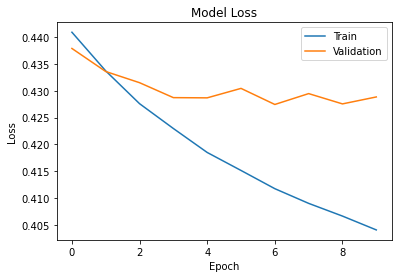

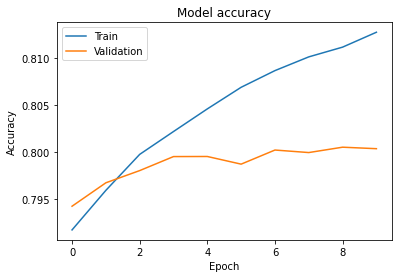

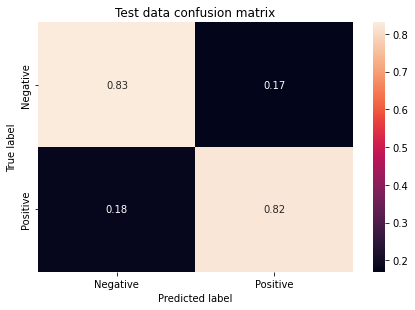

In [ ]:
import matplotlib.pyplot as plt
loss, acc = model.evaluate(x_test, y_test, batch_size=1024, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(history)
confMatPlot(x_test, y_test, ["Negative", "Positive"])

In [ ]:
inputLayer = Input(shape=(50,), dtype='int32')
Embedding_layer = Embedding(inputLayer)
x = Bidirectional(LSTM(150, dropout=0.2, recurrent_dropout=0.2))(Embedding_layer)
outputs = Dense(2,activation='softmax')(x)
model = tf.keras.Model(inputLayer, outputs)

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       multiple                  71436000  
                                                                 
 bidirectional (Bidirectiona  (None, 300)              541200    
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 2)                 602       
                                                                 
Total params: 71,977,802
Trainable params: 541,802
Non-trainable params: 71,436,000
_________________________________________________________________
None


In [ ]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=6,validation_data = (x_valid, y_valid), verbose=1)

Epoch 1/6
1250/1250 [==============================] - 536s 428ms/step - loss: 0.4651 - accuracy: 0.7768 - val_loss: 0.4519 - val_accuracy: 0.7864
Epoch 2/6
1250/1250 [==============================] - 537s 430ms/step - loss: 0.4459 - accuracy: 0.7886 - val_loss: 0.4441 - val_accuracy: 0.7899
Epoch 3/6
1250/1250 [==============================] - 537s 430ms/step - loss: 0.4356 - accuracy: 0.7952 - val_loss: 0.4337 - val_accuracy: 0.7963
Epoch 4/6
1250/1250 [==============================] - 540s 432ms/step - loss: 0.4276 - accuracy: 0.8001 - val_loss: 0.4311 - val_accuracy: 0.7989
Epoch 5/6
1250/1250 [==============================] - 537s 429ms/step - loss: 0.4209 - accuracy: 0.8036 - val_loss: 0.4296 - val_accuracy: 0.7998
Epoch 6/6
1250/1250 [==============================] - 540s 432ms/step - loss: 0.4148 - accuracy: 0.8071 - val_loss: 0.4316 - val_accuracy: 0.7997


Test loss: 0.3596779704093933
Test acc: 0.844011127948761


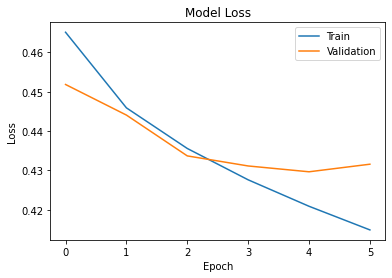

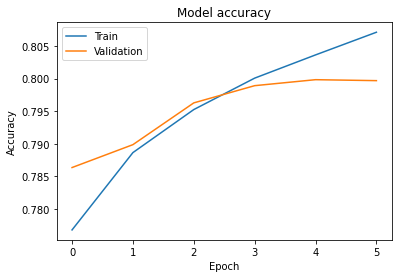

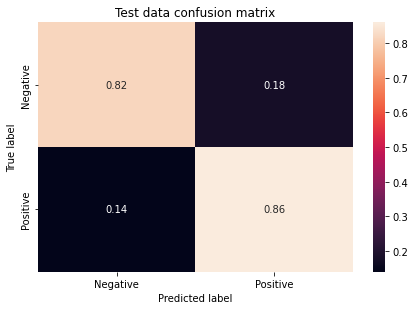

In [ ]:
import matplotlib.pyplot as plt
loss, acc = model.evaluate(x_test, y_test, batch_size=1024, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

LossAccPlot(history)
confMatPlot(x_test, y_test, ["Negative", "Positive"])